In [1]:
from scipy.integrate import quad
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pywt
import pandas as pd


In [2]:
file_name = 'raw2/Air/001'
df_01 = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 
# print(df_01)


for i in range(2,101):
    if i >=100:
        ind = i
    elif i >=10:
        ind = f"0{i}"
    else:
        ind = f"00{i}"
#     ind = f"0{i}" if i>=10 else f"00{i}"
#     print(ind)
    file_name = f"raw2/Air/{ind}" # в каждом файле записано 2 секунды
    df = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"")
    df_01 = pd.concat([df_01, df], ignore_index=True)
print(df_01)

             x            y0      y1      y2          y3
0            0  6.192360e+08 -289792 -171008 -12788500.0
1            1  4.697960e+08 -230912 -148736 -11604200.0
2            2 -1.244080e+09 -199936 -174080  -8936190.0
3            3 -1.498400e+09 -172544 -170240  -2424060.0
4            4 -1.412470e+09 -156672 -176128   2249470.0
...        ...           ...     ...     ...         ...
9599995  95995 -9.864960e+08  -92416 -149248   8080380.0
9599996  95996 -7.913660e+08 -122880 -159488  10091000.0
9599997  95997 -4.326160e+08 -128512 -164096  12604700.0
9599998  95998 -3.662700e+08 -143872 -165888  19279600.0
9599999  95999 -1.133620e+08 -167680 -174080  16589600.0

[9600000 rows x 5 columns]


$$Wavelet\ Pyro$$

In [3]:
Size_pyro = 9_600_000

sst_pyro  = df_01.y0.iloc[:Size_pyro]
df_01.x = df_01.index
time = df_01.x.iloc[:Size_pyro]

dt = 1.0/48_000
wavelet = 'mexh'
max_scale = 6.9
min_scale = 6.5
scales = np.arange(min_scale, max_scale, 0.005)

slase = 95750
size_shape = 500

delta_time = 48000
interval = int(Size_pyro/delta_time)




In [4]:
[cfs_pyro, frequencies] = pywt.cwt(sst_pyro, scales, wavelet, dt)

period = 1.0/frequencies

cfs_pyro_shape = np.array([cfs_pyro[i-1][slase:slase+size_shape] for i in range(len(scales))])

# print(len(cfs_pyro))
# print(len(cfs_pyro[0]))



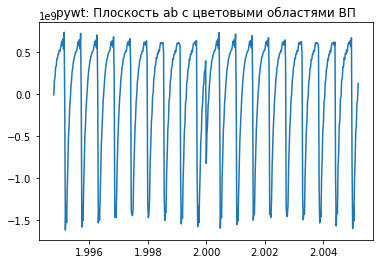

In [5]:
A_scales, B_time = np.meshgrid(time[slase:slase+size_shape]*dt, period)


plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
plt.plot(time[slase:slase+size_shape]*dt, sst_pyro[slase:slase+size_shape])

plt.show()

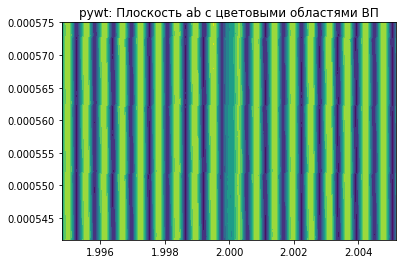

In [6]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# plt.contourf(A_scales, B_time, np.log(abs(cfs_pyro_shape)), 10)
plt.contourf(A_scales, B_time,cfs_pyro_shape,10)
plt.show()

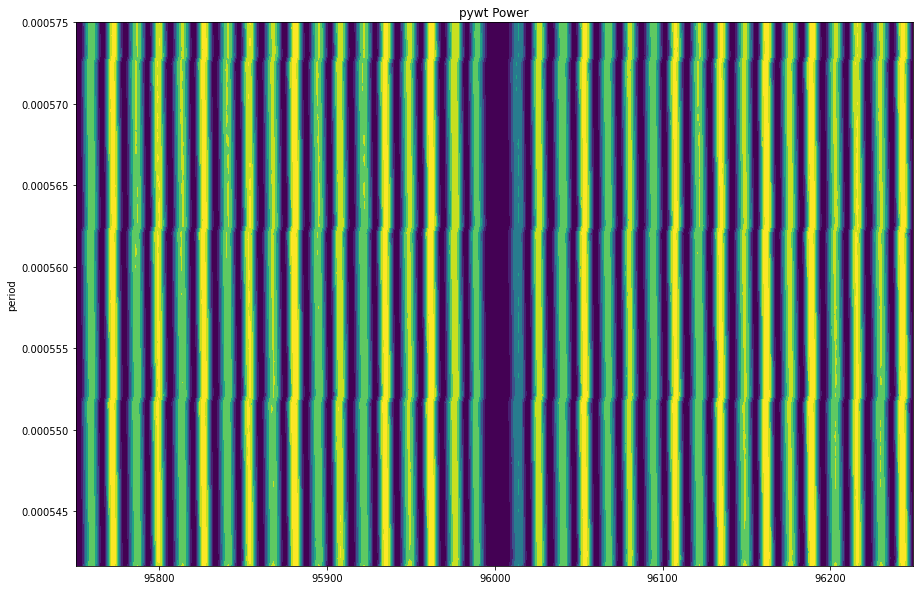

In [7]:
# power_pyro = (abs(cfs_pyro)) ** 2
# print(type(cfs_pyro))
# print(type(cfs_pyro_shape))
power_pyro_shape = (abs(cfs_pyro_shape))**2

# # levels = [0.0625, 0.125, 0.25,]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time[slase:slase+size_shape], period, power_pyro_shape, extend='both')

ax.set_title("pywt Power")
ax.set_ylabel('period')
plt.show()

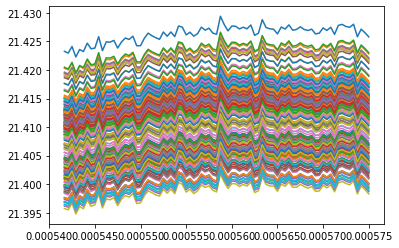

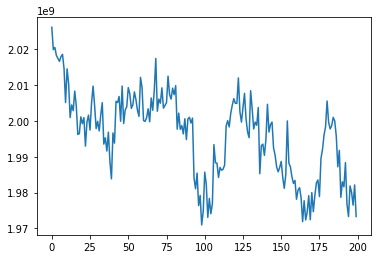

In [8]:
# power_pyro_tr = power_pyro.transpose()
power_pyro_tr = abs(cfs_pyro).transpose()


# Amp_pyro = zeros((interval))
mean_pyro_scales = np.zeros((interval,int(len(scales))))


plt.figure('max_Amp')

Max_pyro_amp_scales = np.zeros((interval))

for j in range(0,interval,1):
    temp_pyro = power_pyro_tr[delta_time*j:delta_time*(j+1)].transpose()
    for i in range(len(scales)):
        mean_pyro_scales[j][i-1] = temp_pyro[i-1].mean()
    plt.plot(period, np.log(mean_pyro_scales[j]))
    Max_pyro_amp_scales[j] = mean_pyro_scales[j].max()
plt.show()


plt.figure('Max_pyro')
plt.plot(Max_pyro_amp_scales)
plt.show()

$$Save\ \  Pyro\ \  in\ \  .csv$$

In [9]:
from pathlib import Path  

df_mean_pyro_scales = pd.DataFrame(mean_pyro_scales)
df_mean_pyro_scales.columns = period
# print(df_mean_pyro_scales)


filepath = Path('wt_raw/pyro_air.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)

df_mean_pyro_scales.to_csv(filepath) 

# print(df_mean_pyro_scales)


$$KERNEL\ \  FALLED$$

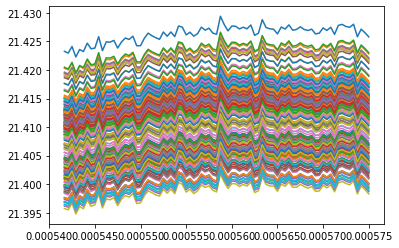

1789.709172259509


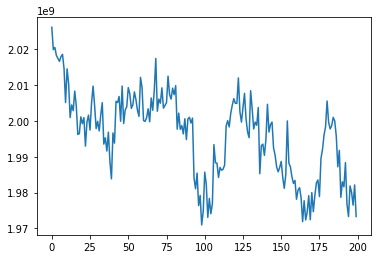

In [13]:
file_name_pyro = 'wt_raw/pyro_air.csv'
df_pyro_Amp = pd.read_csv(file_name_pyro) 
df_pyro_Amp = df_pyro_Amp.drop('Unnamed: 0', axis = 1)


mean_pyro_scales = df_pyro_Amp.to_numpy()

period = [float(str_j) for str_j in list(df_pyro_Amp.columns)]

plt.figure('max_Amp')
    
Max_pyro_amp_scales = np.zeros((interval))

for j in range(0,interval,1):
    plt.plot(period, np.log(mean_pyro_scales[j]))
    Max_pyro_amp_scales[j] = mean_pyro_scales[j].max()
#     print(1.0/period[mean_pyro_scales[j].argmax()])
plt.show()

print(1.0/period[mean_pyro_scales[1].argmax()])


plt.figure('Max_pyro')
plt.plot(Max_pyro_amp_scales)
plt.show()    





$$Wavelet \ OAD$$

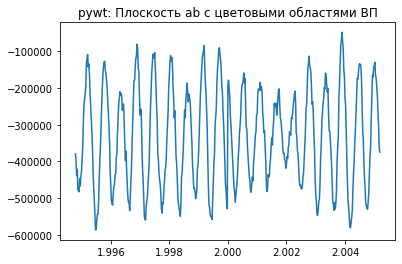

In [14]:
sst_oad  = df_01.y1.iloc[:Size_pyro]

[cfs_oad, frequencies] = pywt.cwt(sst_oad, scales, wavelet, dt)

A_scales, B_time = np.meshgrid(time[slase:slase+size_shape]*dt, period)
# A_scales, B_time = meshgrid(time[:size_shape],scales)

# cfs_oad_shape = array([cfs_oad[i-1][:size_shape] for i in scales])
cfs_oad_shape = np.array([cfs_oad[i-1][slase:slase+size_shape] for i in range(len(scales))])


plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
plt.plot(time[slase:slase+size_shape]*dt, sst_oad[slase:slase+size_shape])

plt.show()

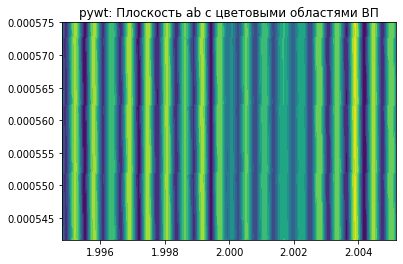

In [15]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# plt.contourf(A_scales, B_time, np.log(abs(cfs_oad_shape)), 10)
plt.contourf(A_scales, B_time, cfs_oad_shape, 10)
plt.show()

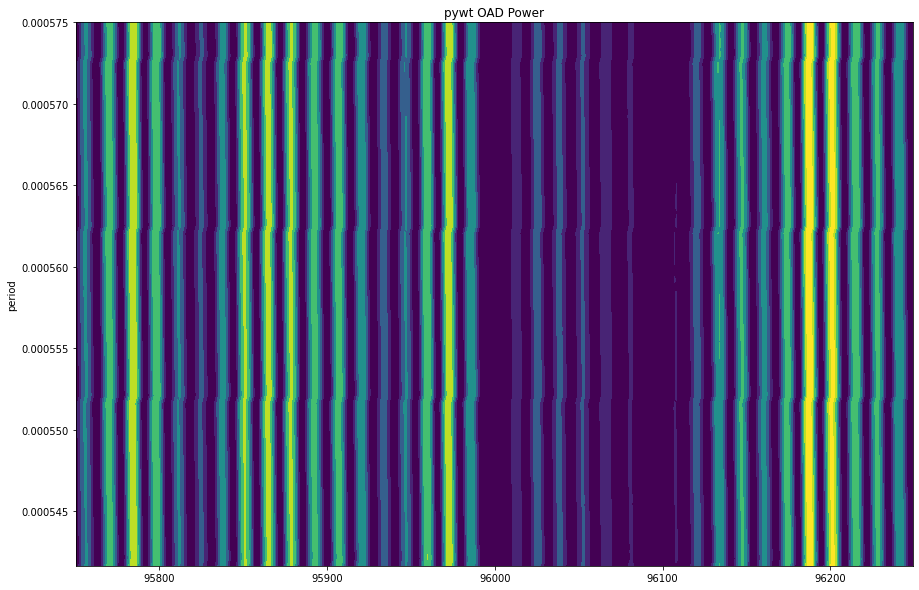

In [16]:
# power_oad = (abs(cfs_oad)) ** 2
power_oad_shape = (abs(cfs_oad_shape))**2


period = 1. / frequencies
# levels = [0.0625, 0.125, 0.25,]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time[slase:slase+size_shape], period, power_oad_shape, extend='both')

ax.set_title("pywt OAD Power")
ax.set_ylabel('period')
plt.show()

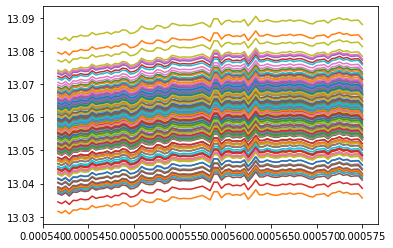

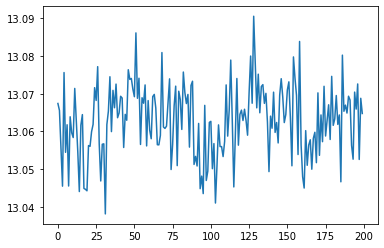

In [17]:
# power_oad_tr = power_oad.transpose()
power_oad_tr = abs(cfs_oad).transpose()
# Amp_oad = zeros((interval))


mean_oad_scales = np.zeros((interval,int(len(scales))))

Max_oad_amp_scales = np.zeros((interval))

plt.figure('max_Amp')

for j in range(0,interval,1):
    temp_oad = power_oad_tr[delta_time*j:delta_time*(j+1)].transpose()
    for i in range(len(scales)):
        mean_oad_scales[j][i-1] = temp_oad[i-1].mean()
    plt.plot(period, np.log(mean_oad_scales[j]))
    Max_oad_amp_scales[j] = mean_oad_scales[j].max()
plt.show()

plt.figure('Max_oad')
plt.plot(np.log(Max_oad_amp_scales))
plt.show()

$$Save \ OAD \ to \ .csv$$

In [18]:
from pathlib import Path  

df_mean_oad_scales = pd.DataFrame(mean_oad_scales)
df_mean_oad_scales.columns = period
# print(df_mean_pyro_scales)


filepath = Path('wt_raw/oad_air.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)

df_mean_oad_scales.to_csv(filepath) 

# print(df_mean_pyro_scales)

$$ KERNEL \ FALLED$$

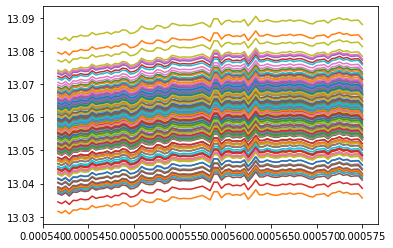

1775.1479289940846


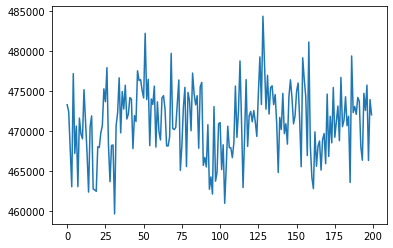

In [50]:
file_name_oad = 'wt_raw/oad_air.csv'
df_oad_Amp = pd.read_csv(file_name_oad) 
df_oad_Amp = df_oad_Amp.drop('Unnamed: 0', axis = 1)


mean_oad_scales = df_oad_Amp.to_numpy()

period = [float(str_j) for str_j in list(df_oad_Amp.columns)]

plt.figure('max_Amp')
    
Max_oad_amp_scales = np.zeros((interval))

for j in range(0,interval,1):
    plt.plot(period, np.log(mean_oad_scales[j]))
    Max_oad_amp_scales[j] = mean_oad_scales[j].max()
#     print(1.0/(period[mean_oad_scales[j].argmax()]))
plt.show()

print(1.0/(period[mean_oad_scales[1].argmax()]))




plt.figure('Max_oad')
plt.plot(Max_oad_amp_scales)
plt.show()    



$$Wavelet \ \ \ OAD\ / \ Pyro$$

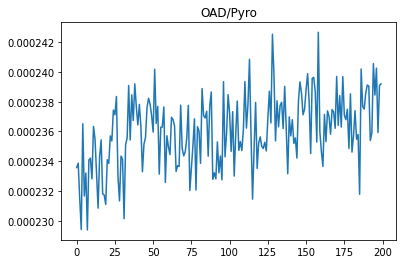

In [22]:
S_wavelet = Max_oad_amp_scales/Max_pyro_amp_scales
plt.figure('max_Amp')
plt.title('OAD/Pyro', size=12)
plt.plot(S_wavelet)
plt.show()

$$Fourier \ Transform$$

In [66]:
import numpy as np
import scipy.integrate
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from scipy.optimize import curve_fit
import math

SAMPLE_RATE = 48000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

max_intensity_OAD = np.zeros(200)
max_index_OAD = np.zeros(200)
max_intensity_Pyro = np.zeros(200)
max_index_Pyro = np.zeros(200)


min_freq = 1770
max_freq = 1810


for i in range(1,101):
    if i >=100:
        ind = i
    elif i >=10:
        ind = f"0{i}"
    else:
        ind = f"00{i}"
    file_name = f"raw2/Air/{ind}" # в каждом файле записано 2 секунды
    df = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 

    Pyro = df.y0.values[0:SAMPLE_RATE]
    OAD = df.y1.values[0:SAMPLE_RATE]

    xf = rfftfreq(N, 1 / SAMPLE_RATE)
    Pyro_f = rfft(Pyro)
    OAD_f = rfft(OAD)

    max_intensity_OAD[2*(i-1)] = np.max(np.abs(OAD_f[min_freq:max_freq]))
    max_index_OAD[2*(i-1)] = np.argmax(np.abs(OAD_f[min_freq:max_freq]))
    max_intensity_Pyro[2*(i-1)] = np.max(np.abs(Pyro_f[min_freq:max_freq]))
    max_index_Pyro[2*(i-1)] = np.argmax(np.abs(Pyro_f[min_freq:max_freq]))

    Pyro = df.y0.values[SAMPLE_RATE:]
    OAD = df.y1.values[SAMPLE_RATE:]
    Pyro_f = rfft(Pyro)
    OAD_f = rfft(OAD)
    max_intensity_OAD[2*(i-1)+1] = np.max(np.abs(OAD_f[min_freq:max_freq]))
    max_index_OAD[2*(i-1)+1] = np.argmax(np.abs(OAD_f[min_freq:max_freq]))
    max_intensity_Pyro[2*(i-1)+1] = np.max(np.abs(Pyro_f[min_freq:max_freq]))
    max_index_Pyro[2*(i-1)+1] = np.argmax(np.abs(Pyro_f[min_freq:max_freq]))
#     print(xf[min_freq + np.argmax(np.abs(Pyro_f[min_freq:max_freq]))])
#     print(xf[min_freq + np.argmax(np.abs(OAD_f[min_freq:max_freq]))])

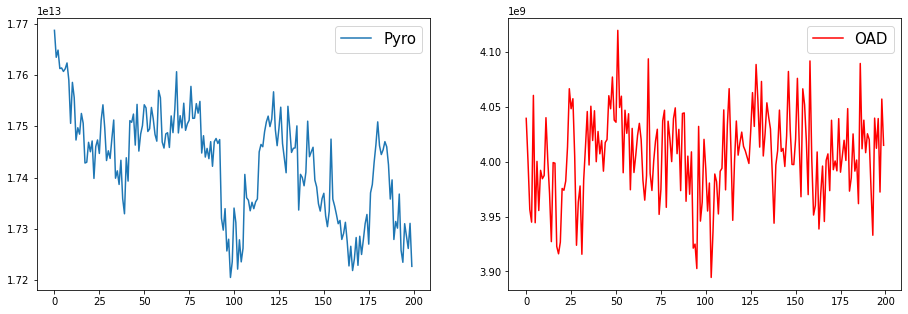

In [26]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],max_intensity_Pyro, label='Pyro')
ax1.legend(prop={'size': 15})

ax2 = fig.add_subplot(122)
ax2.plot([i for i in range(200)],max_intensity_OAD, 'red', label='OAD')
ax2.legend(prop={'size': 15})

0.010722099776591281


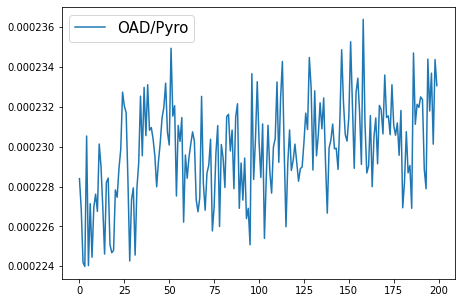

In [28]:
S_fourier = max_intensity_OAD/max_intensity_Pyro
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier, label='OAD/Pyro')
ax1.legend(prop={'size': 15})

print(S_fourier.std()/S_fourier.mean())


# from scipy.optimize import curve_fit

# def func_theory(x, A, B):
#     return A + B*x


# x = np.arange(200)

# popt, pcov = curve_fit(func_theory, x, S_fourier)

# A_opt,B_opt = popt

# print(B_opt/S_fourier.mean()*100)

# d_S_f = S_fourier - func_theory(x,A_opt,B_opt)
# print(d_S_f.std()/S_fourier.mean()*100)



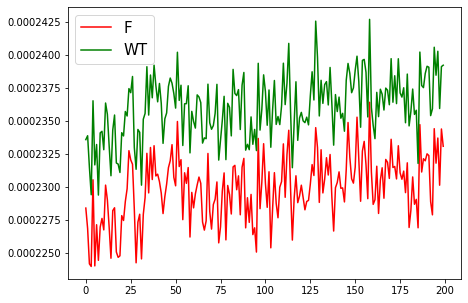

In [29]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier, label='F', color = 'red')
ax1.plot([i for i in range(200)],S_wavelet, label='WT', color = 'green')
ax1.legend(prop={'size': 15})

In [30]:
print(S_fourier.std()-S_wavelet.std())

6.814840461953776e-08


In [31]:
print(S_fourier.std()/S_fourier.mean(), S_wavelet.std()/S_wavelet.mean())

0.010722099776591281 0.0101526446353034


In [32]:
print((S_fourier - S_wavelet).mean())

-6.1798582636651485e-06


In [33]:
print((S_fourier - S_wavelet).mean()/S_fourier.mean()*100)

-2.6886268930090607


           x            y0      y1      y2          y3
0          0  3.706240e+08 -477184 -144384   7363070.0
1          1  4.079150e+08 -482816 -153088   2347010.0
2          2  4.390580e+08 -444672 -162560   1239810.0
3          3  4.658210e+08 -453632 -162560  -4664060.0
4          4  4.908690e+08 -461056 -150784  -7948800.0
...      ...           ...     ...     ...         ...
95995  95995  6.520020e+08 -172800 -161024 -12054000.0
95996  95996  3.153500e+08 -139776 -136192 -10880500.0
95997  95997 -1.398840e+09  -97792 -134144  -8109310.0
95998  95998 -1.438870e+09 -120576 -145920  -1685760.0
95999  95999 -1.457650e+09 -116480 -140800   1730050.0

[96000 rows x 5 columns]


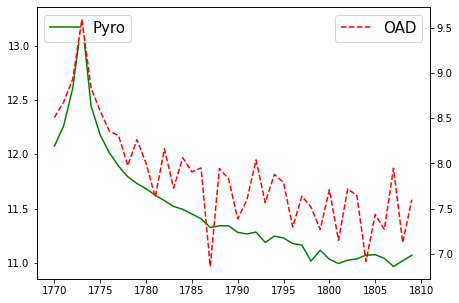

In [68]:
file_name = 'raw2/Air/010'
df1 = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 
print(df1)
SAMPLE_RATE = 48000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

Pyro = df1.y0.values[:SAMPLE_RATE]
Pyro_f = rfft(Pyro)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

OAD = df1.y1.values[:SAMPLE_RATE]
OAD_f = rfft(OAD)

fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax1.plot(xf[min_freq:max_freq], np.log10(np.abs(Pyro_f[min_freq:max_freq])), 'green', label='Pyro')
ax2.plot(xf[min_freq:max_freq], np.log10(np.abs(OAD_f[min_freq:max_freq])), color='red', linestyle='--', label='OAD')
ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')

